In [3]:
# try frobenius method??


# test residuals to see if (x, t) solution satisfies original differential equations

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from cswe_harm import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


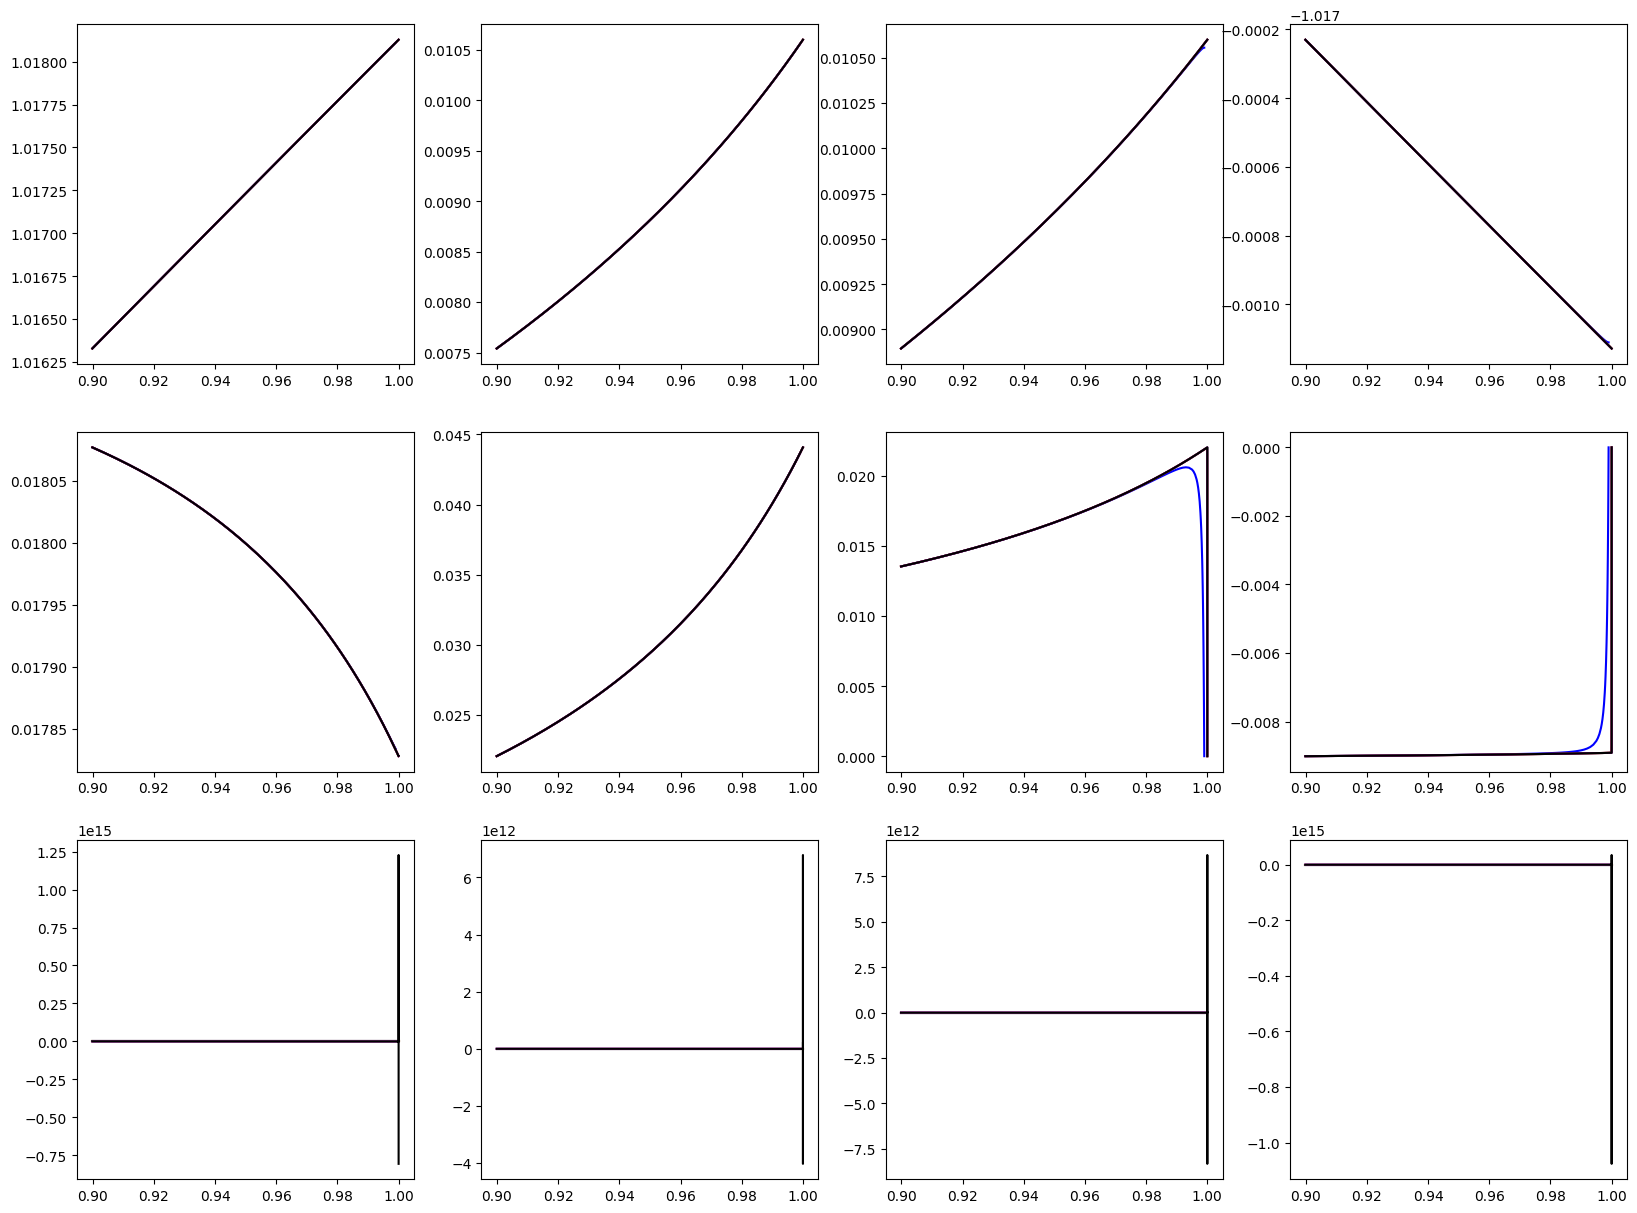

In [4]:
csweharm = CSWEHarm()
csweharm.debug= False
csweharm.h0 = 0.1
csweharm.r = 0.24

fig, axs = plt.subplots(3, 4, figsize=(20, 15))

cols = ['b', 'r', 'g', 'm', 'k', 'c']
sns = [1e-3, 1e-5, 1e-7, 1e-9, 1e-11]
for bnd_i in range(len(sns)):
    csweharm.domain_reduction = sns[bnd_i]
    csweharm.solve_LO_reduced_domain()

    st =  np.argmin(abs(csweharm.y0.x - 0.999))
    st =  np.argmin(abs(csweharm.y0.x - 0.9))

    for i in range(4):
        axs[0, i].plot(csweharm.y0.x[st:], csweharm.y0.y[i][st:], cols[bnd_i])
        axs[1, i].plot(csweharm.y0.x[st:], csweharm.y0.sol(csweharm.y0.x, nu=1)[i][st:], cols[bnd_i])
        axs[2, i].plot(csweharm.y0.x[st:], csweharm.y0.sol(csweharm.y0.x, nu=2)[i][st:], cols[bnd_i])


plt.show()

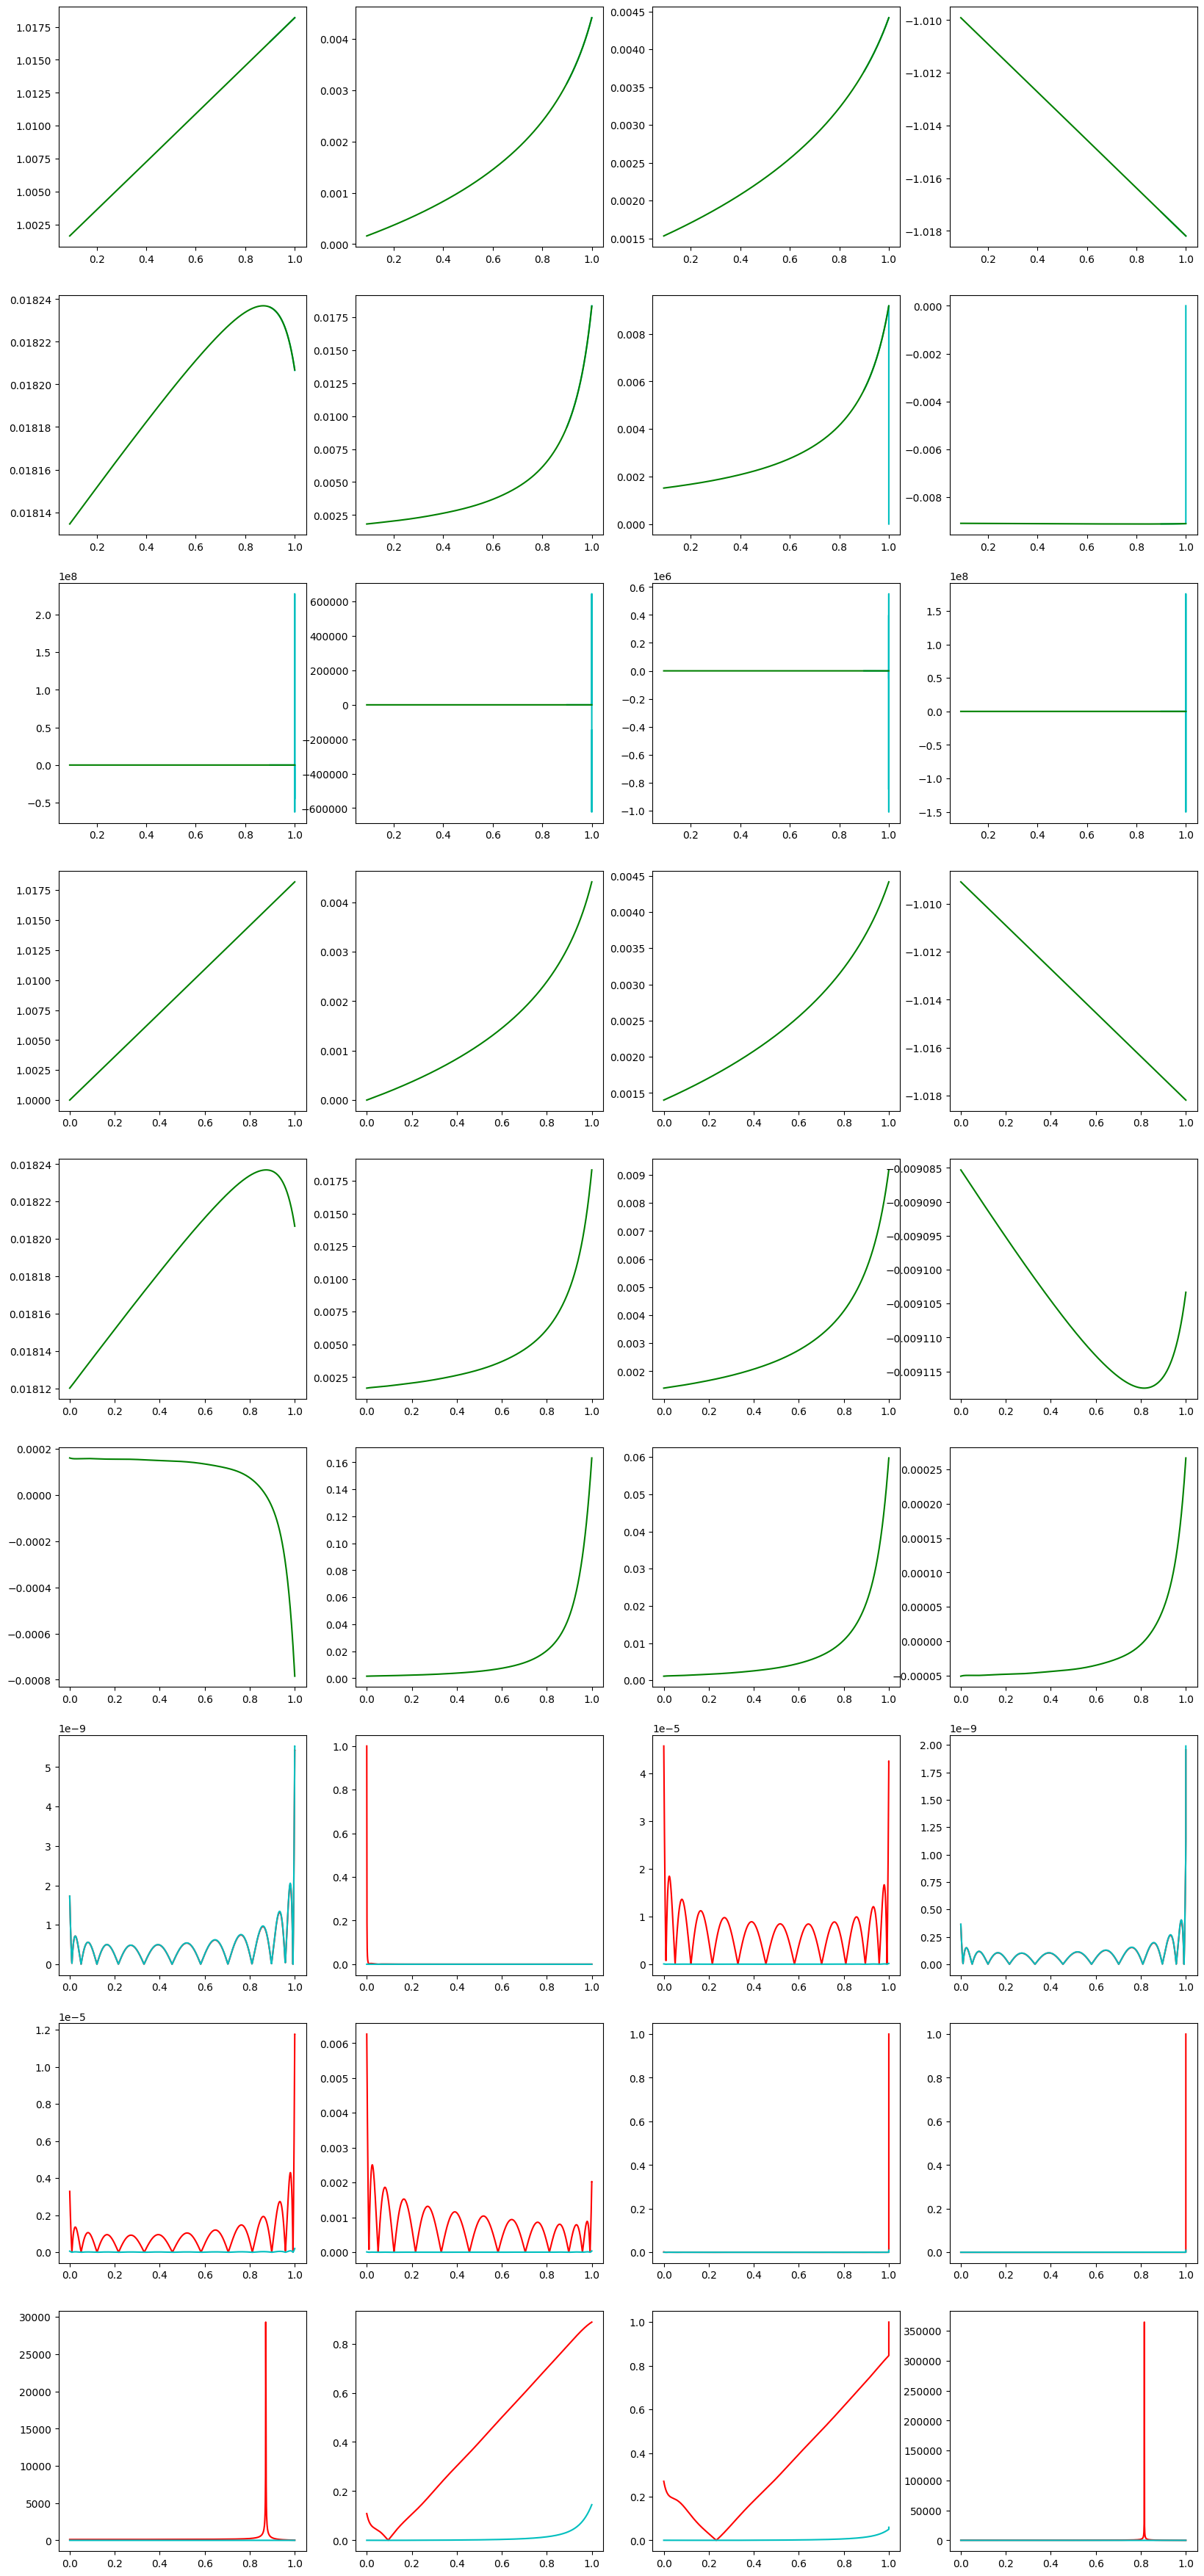

In [5]:
csweharm = CSWEHarm()
csweharm.debug= False
csweharm.h0 = 0.1
csweharm.r = 0.1

fig, axs = plt.subplots(9, 4, figsize=(20, 45))

cols = ['b', 'r', 'g', 'm', 'k', 'c']
sns = [1e-3, 1e-5, 1e-7, 1e-9, 1e-11]

cols = ['c']
cols2=['g']
sns = [1e-7]
for bnd_i in range(len(sns)):
    csweharm.small_number = sns[bnd_i]
    csweharm.solve_LO_small_number()

    st =  np.argmin(abs(csweharm.y0.x - 0.999))
    st =  np.argmin(abs(csweharm.y0.x - 0.9))

    for i in range(4):
        axs[0, i].plot(csweharm.y0.x[st:], csweharm.y0.sol(csweharm.y0.x)[i][st:], cols[bnd_i])
        axs[1, i].plot(csweharm.y0.x[st:], csweharm.y0.sol(csweharm.y0.x, nu=1)[i][st:], cols[bnd_i])
        axs[2, i].plot(csweharm.y0.x[st:], csweharm.y0.sol(csweharm.y0.x, nu=2)[i][st:], cols[bnd_i])

    csweharm.interpolate_LO()
    for i in range(4):
        axs[0, i].plot(csweharm.xi[st:], csweharm.y0i(csweharm.xi)[i][st:], cols2[bnd_i])
        axs[1, i].plot(csweharm.xi[st:], csweharm.y0i(csweharm.xi, nu=1)[i][st:], cols2[bnd_i])
        axs[2, i].plot(csweharm.xi[st:], csweharm.y0i(csweharm.xi, nu=2)[i][st:], cols2[bnd_i])

        axs[3, i].plot(csweharm.y0.x, csweharm.y0i(csweharm.y0.x)[i], cols2[bnd_i])
        axs[4, i].plot(csweharm.y0.x, csweharm.y0i(csweharm.y0.x, nu=1)[i], cols2[bnd_i])
        axs[5, i].plot(csweharm.y0.x, csweharm.y0i(csweharm.y0.x, nu=2)[i], cols2[bnd_i])

        axs[6, i].plot(csweharm.y0.x, abs((csweharm.y0i(csweharm.y0.x)[i] - csweharm.y0.sol(csweharm.y0.x)[i]) / csweharm.y0i(csweharm.y0.x)[i]) , 'r')
        axs[7, i].plot(csweharm.y0.x, abs((csweharm.y0i(csweharm.y0.x, nu=1)[i] - csweharm.y0.sol(csweharm.y0.x, nu=1)[i]) / csweharm.y0i(csweharm.y0.x, nu=1)[i]), 'r')
        axs[8, i].plot(csweharm.y0.x, abs((csweharm.y0i(csweharm.y0.x, nu=2)[i] - csweharm.y0.sol(csweharm.y0.x, nu=1)[i]) / csweharm.y0i(csweharm.y0.x, nu=2)[i]), 'r')

        axs[6, i].plot(csweharm.y0.x, abs((csweharm.y0i(csweharm.y0.x)[i] - csweharm.y0.sol(csweharm.y0.x)[i])) , 'c')
        axs[7, i].plot(csweharm.y0.x, abs((csweharm.y0i(csweharm.y0.x, nu=1)[i] - csweharm.y0.sol(csweharm.y0.x, nu=1)[i])), 'c')
        axs[8, i].plot(csweharm.y0.x, abs((csweharm.y0i(csweharm.y0.x, nu=2)[i] - csweharm.y0.sol(csweharm.y0.x, nu=1)[i])), 'c')


plt.show()

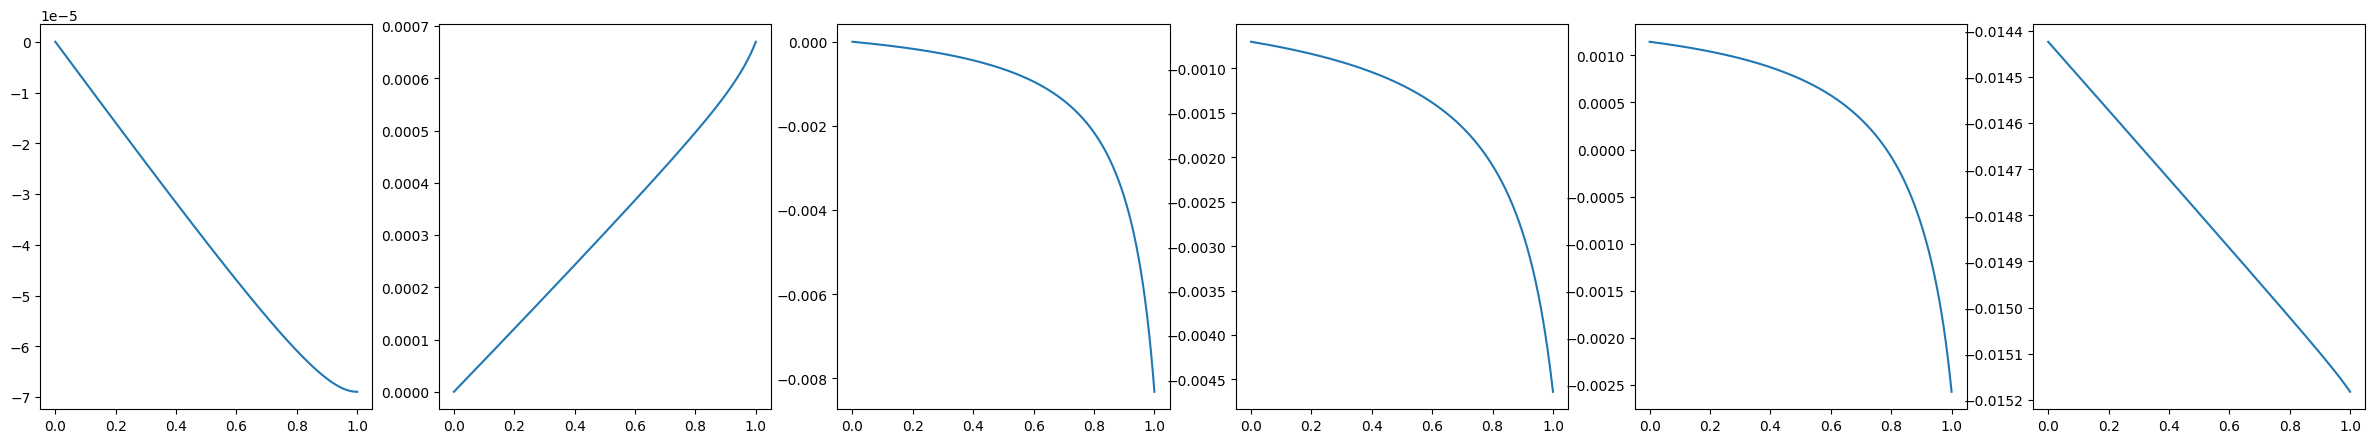

In [6]:
csweharm.debug = False
csweharm.solve_FO_small_number_interpolation_based()


fig, axs = plt.subplots(1, 6, figsize=(30, 5))
for i in range(6):
    axs[i].plot(csweharm.x, csweharm.y1.sol(csweharm.x)[i])

plt.show()
